In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df['income'] = [0 if x == '<=50K' else 1 for x in df['income']]
df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [4]:
df['native-country'] = ['United-States' if x == 'United-States' else 'others' for x in df ['native-country']]

In [5]:
X= df.iloc[:,:-1]
y= df.iloc[:,14]
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
cat_data = X[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']]

In [7]:
cat_data.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States


In [8]:
X = X.drop(cat_data,1)
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


In [9]:
D_data = pd.get_dummies(cat_data, drop_first = True)
D_data.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_others
0,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [10]:
X = pd.concat([X, D_data], axis=1)

In [11]:
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_others
0,25,226802,7,0,0,40,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,18,103497,10,0,0,30,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc_X = StandardScaler()

In [15]:
X_train = sc_X.fit_transform(X_train)

D:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
X_test=sc_X.transform(X_test)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [38]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, auc

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train,y_train)
y_pred1 = logreg.predict(X_test)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
print (accuracy_score(y_test, y_pred1))

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8512250051184058


In [35]:
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier(criterion='entropy', max_depth=7)
t.fit(X_train,y_train)
y_pred2 = t.predict(X_test)
t_roc_auc = roc_auc_score(y_test, t.predict(X_test))
fpr2, tpr2, thresholds2 = roc_curve(y_test, t.predict_proba(X_test)[:,1])
print (accuracy_score(y_test, y_pred2))

0.8544325394117246


In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rf.fit(X_train,y_train)
y_pred3 = rf.predict(X_test)
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr3, tpr3, thresholds3 = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
print (accuracy_score(y_test, y_pred3))

0.8574353374735549


In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred4 = gnb.predict(X_test)
gnb_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
fpr4, tpr4, thresholds4 = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
print (accuracy_score(y_test, y_pred4))

0.6350235446666211


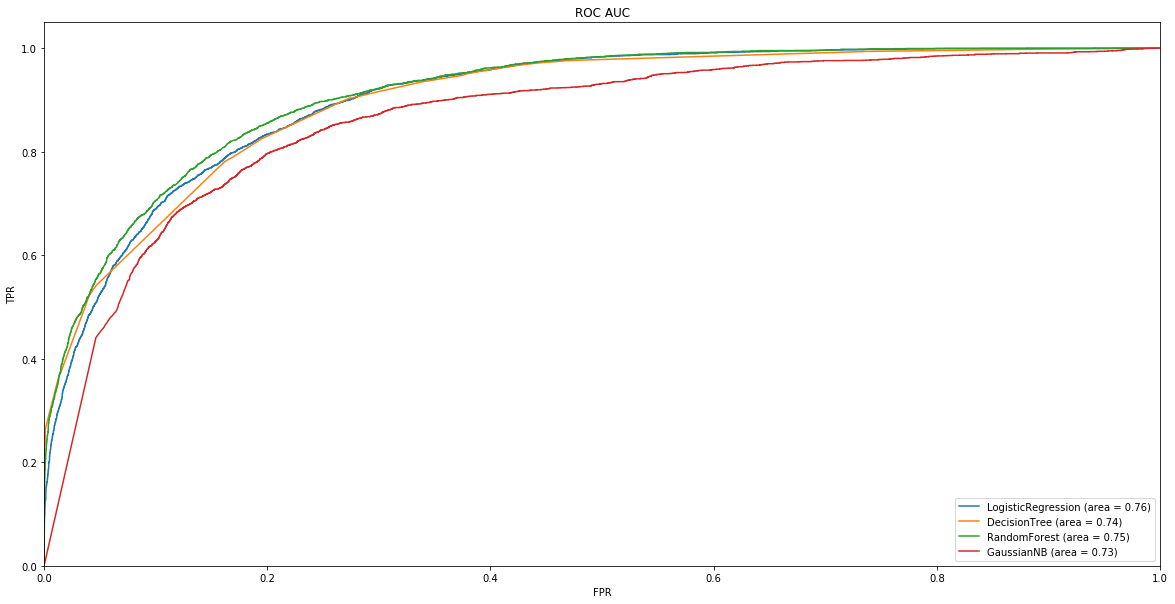

LogisticRegression:
0.9035345275244718
DecisionTree:
0.9008329997877398
RandomForest:
0.9116319715392589
GaussianNB:
0.864353282126954


In [39]:
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='LogisticRegression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr2, tpr2, label='DecisionTree (area = %0.2f)' % t_roc_auc)
plt.plot(fpr3, tpr3, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot(fpr4, tpr4, label='GaussianNB (area = %0.2f)' % gnb_roc_auc)
plt.xlim([0.0 ,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC')
plt.legend(loc="lower right")
plt.show()

print ('LogisticRegression:')
print (auc(fpr,tpr))
print ('DecisionTree:')
print (auc(fpr2,tpr2))
print ('RandomForest:')
print (auc(fpr3,tpr3))
print ('GaussianNB:')
print (auc(fpr4,tpr4))